# Kmeans Clustering.

In [1]:
 # https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-6-clustering/

 ## Important Links:

1. [Sklearn Clustering Notes](https://scikit-learn.org/stable/modules/clustering.html)


2. [Kmeans clustering sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

***
i) Parallel K-means Clustering:
    
* [ i) Parallel K-means Clustering. Sklearn demo 1](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)
* [ ii) Parallel K-means Clustering Kmeans using different cluster quality metrics](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)
    
    
ii) MiniBatch Kmeans
    
* [i) comparision between kmeans & Mini batch kmeans](https://scikitlearn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py)
* [ii) Clustering text documents using k-means](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)
* [iii) Online learning of a dictionary of parts of faces](https://scikit-learn.org/stable/auto_examples/cluster/plot_dict_face_patches.html#sphx-glr-auto-examples-cluster-plot-dict-face-patches-py)

     
***

3. [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

# Kmeans Clustering

 ## Step 1: Import libraries required.

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 ## Step 2: Load dataset

In [3]:
dataset = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [4]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# Column rename.

dataset= dataset.rename(columns={'ID#':'ID', 'Award?':'Award'})

Data feature information availabele in https://github.com/ShrikantUppin/Clustering/tree/main/1.%20Data%20preprocessing%20%26%20PCA%20output

 ## Step 3: Data preprocessing & PCA

In [6]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  dataset.drop(['ID','Award'], axis=1)
dataset1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [7]:
# standardization of dataset1

from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3999, 10)

In [8]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca = PCA(random_state=10, n_components=0.95)
x_reduced = pca.fit_transform(std_df)

In [9]:
# eigenvalues..

print(pca.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [10]:
# variance containing in each formed PCA

print(pca.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [11]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

 ## K-means cluster hyperparameter tuning:

model1


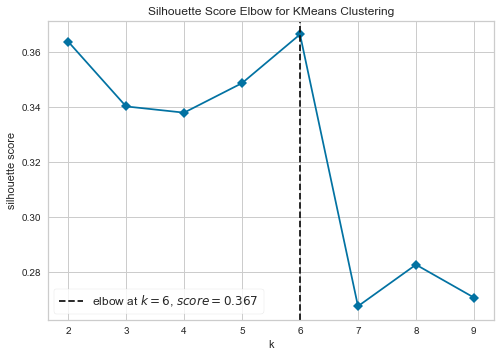

model2


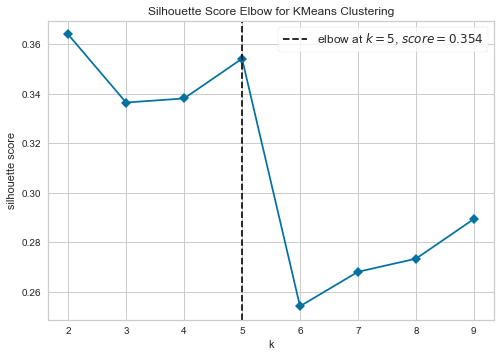

In [12]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model
model1 = KMeans(random_state=0,n_jobs=-1)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(x_reduced)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(x_reduced)    
visualizer2.poof()
plt.show()

 #### Conclusion:
 
* Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.


* Also it is proved that even if we feed data either PCA or scaled data outliers will always affect in kmeans clustering. Also when random_state value, max_iter number n_int chnaged the clustering numbers changed.


* So before using KMeans clustering it is better to have discussion or decision on outliers.

In [58]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels = clusterer.fit_predict(x_reduced)
    sil_score= silhouette_score(x_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961763
For n_clusters = 3 The average silhouette_score is : 0.3403814231068285
For n_clusters = 4 The average silhouette_score is : 0.3381189559647632
For n_clusters = 5 The average silhouette_score is : 0.3488588702945302
For n_clusters = 6 The average silhouette_score is : 0.3665724589453309
For n_clusters = 7 The average silhouette_score is : 0.2677310100582736
For n_clusters = 8 The average silhouette_score is : 0.2828423666585155
For n_clusters = 9 The average silhouette_score is : 0.27087656757092415


 ## Run K-Means:

In [76]:
# model building

model = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict = model.fit_predict(x_reduced)

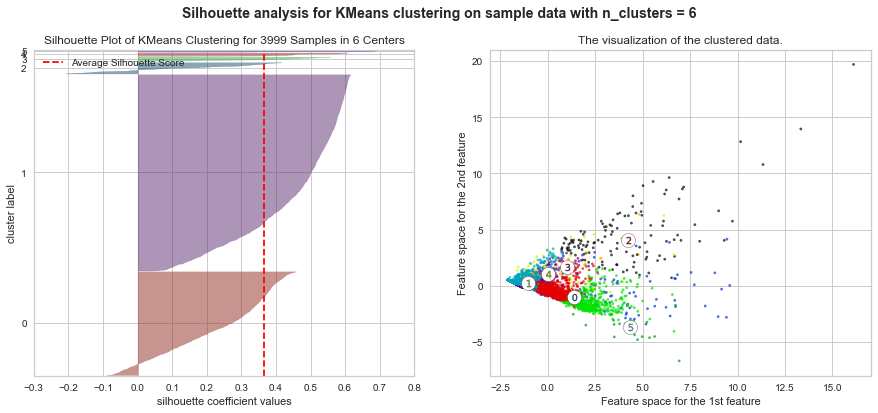

In [79]:
# visualizing silhoutte score..for different cluster

from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer = SilhouetteVisualizer(model,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer.fit(x_reduced)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(x_reduced[:, 0], x_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer.show()
plt.show()